# MVP Análise de Dados e Boas Práticas

**Nome:** Bruno Barreto Chvaicer

**Matrícula:** -----

**Dataset:** [Flight Delays and Cancellations – maio/2015](https://www.kaggle.com/datasets/usdot/flight-delays)


# Descrição do Problema

O conjunto de dados contém informações sobre voos comerciais nos Estados Unidos em maio de 2015. O objetivo deste projeto é investigar os fatores que influenciam os atrasos nos voos e desenvolver um modelo de classificação capaz de prever se um voo terá atraso na chegada.

## Hipóteses do Problema

As hipóteses que tracei são as seguintes:



*   É possível estimar se um voo terá atraso na chegada com base na hora de partida e no dia da semana?
*   Existe uma correlação entre atraso na chegada de um voo e o tempo de taxiamento na saída?
*   A distância do voo pode ser usada para prever o tempo de atraso na chegada?







## Tipo de Problema

Este é um problema de aprendizado supervisionado, do tipo classificação. O objetivo é prever se um voo terá atraso, com base em variáveis relevantes do dataset (dia da semana, horário de partida, tempo de taxiamento na saída, distância do voo, etc.).

## Seleção de Dados

O dataset original foi retirado do Kaggle, contendo dados de todos os meses. Para este projeto, foi selecionado apenas o subconjunto referente ao mês de maio de 2015, totalizando cerca de 497 mil registros.

## Atributos do Dataset

O dataset contém aroximadamente 497 mil registros de voos do mês de maio de 2015 e possui 31 atributos:


| Coluna                | Descrição                                  |
| --------------------- | ------------------------------------------ |
| YEAR                  | Ano do voo (2015)                          |
| MONTH                 | Mês do voo (12)                            |
| DAY                   | Dia do mês                                 |
| DAY\_OF\_WEEK         | Dia da semana (1=Segunda, 7=Domingo)       |
| AIRLINE               | Código da companhia aérea                  |
| FLIGHT\_NUMBER        | Número do voo                              |
| TAIL\_NUMBER          | Número de identificação da aeronave        |
| ORIGIN\_AIRPORT       | Aeroporto de origem                        |
| DESTINATION\_AIRPORT  | Aeroporto de destino                       |
| SCHEDULED\_DEPARTURE  | Horário programado de partida (HHMM)       |
| DEPARTURE\_TIME       | Horário real de partida                    |
| DEPARTURE\_DELAY      | Atraso na partida (em minutos)             |
| TAXI\_OUT             | Tempo de taxiamento de saída               |
| WHEELS\_OFF           | Horário que o avião decolou                |
| SCHEDULED\_TIME       | Tempo total de voo programado (em minutos) |
| ELAPSED\_TIME         | Tempo total real do voo                    |
| AIR\_TIME             | Tempo em voo                               |
| DISTANCE              | Distância percorrida                       |
| WHEELS\_ON            | Horário de pouso                           |
| TAXI\_IN              | Tempo de taxiamento na chegada             |
| SCHEDULED\_ARRIVAL    | Horário programado de chegada (HHMM)       |
| ARRIVAL\_TIME         | Horário real de chegada                    |
| ARRIVAL\_DELAY        | Atraso na chegada (em minutos)             |
| DIVERTED              | 1 = voo alternado, 0 = não                 |
| CANCELLED             | 1 = cancelado, 0 = não                     |
| CANCELLATION\_REASON  | Motivo do cancelamento                     |
| AIR\_SYSTEM\_DELAY    | Atraso por sistema aéreo                   |
| SECURITY\_DELAY       | Atraso por segurança                       |
| AIRLINE\_DELAY        | Atraso por companhia aérea                 |
| LATE\_AIRCRAFT\_DELAY | Atraso pela chegada tardia da aeronave     |
| WEATHER\_DELAY        | Atraso por clima                           |


Nesta etapa já podemos reparar que alguns campos presentes no dataset não serão relevantes para o objeto de estudo como por exemplo SCHEDULED_ARRIVAL (pois estamos analisando somente informações de horário de chegada real e não programado e temos o atributo ARRIVAL_DELAY onde podemos identificar se houve atraso ou não), entre outros que não estamos utilizando como variáveis nas hipóteses levantadas:
*   WHEELS_OFF;
*   SCHEDULED_TIME;
*   ELAPSED_TIME;
*   AIR_TIME;
*   DEPARTURE_DELAY;
*   ORIGIN_AIRPORT;
*   DESTINATION_AIRPORT;
*   SCHEDULED_DEPARTURE;
*   AIRLINE;
*   TAXI_IN.



Também podemos perceber, por suas definições, que alguns atributos do dataset são irrelevantes para responder as hipóteses sugeridas (ex.: CANCELLATION_REASON, AIR_SYSTEM_DELAY, AIRLINE_DELAY, LATE_AIRCRAFT_DELAY, WEATHER_DELAY), visto que informações contidas nesses atributos são mais relevantes ao motivo do atraso, que não será objeto de estudo deste projeto.

Os tratamentos citados serão feitos na seção seguinte.

# Importação das Bibliotecas Necessárias e Carga de Dados

Esta seção consolida todas as importações de bibliotecas necessárias para a análise, visualização e pré-processamento dos dados, bem como o carregamento inicial do dataset.

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from sklearn.model_selection import train_test_split

In [42]:
# Carregamento do dataset (aqui, ele fica disponível nesse método)
url = "https://raw.githubusercontent.com/brunobarreto93/mvp-dados-atrasas-voos/main/novo_arquivo_filtrado.csv"

In [43]:
# Guarda o dataset em um dataframe
df = pd.read_csv(url)

In [44]:
#Elimina as variáveis informadas na seção anterior (Atributos do Dataset)
var_remover = ['SCHEDULED_ARRIVAL', 'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DEPARTURE_DELAY',
               'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE', 'AIRLINE', 'TAXI_IN', 'CANCELLATION_REASON',
               'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']
df.drop(var_remover, axis = 1, inplace = True)

# Análise e Tratamento de Dados

Nesta etapa de realizar um Tratamento Inicial e uma Análise de Dados Exploratória (EDA) sobre o dataset, visamos entender a distribuição, as relações e as características das variáveis, assim como realizar tratamentos iniciais que serão cruciais para as etapas subsequentes de pré-processamento e modelagem.

## Exemplo dos dados do dataset


In [45]:
# Primeiras linhas e todas as colunas
pd.set_option('display.max_columns', None)
df.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,TAIL_NUMBER,DEPARTURE_TIME,TAXI_OUT,DISTANCE,WHEELS_ON,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED
0,2015,5,1,5,2366,N3LPAA,2355.0,13.0,2330,739.0,747.0,-5.0,0,0
1,2015,5,1,5,794,N567UW,9.0,23.0,2402,819.0,828.0,3.0,0,0
2,2015,5,1,5,1666,N76517,15.0,21.0,1379,524.0,532.0,11.0,0,0
3,2015,5,1,5,1230,N3ENAA,4.0,11.0,1660,538.0,542.0,-28.0,0,0
4,2015,5,1,5,448,N552UW,17.0,19.0,1727,558.0,604.0,-3.0,0,0


Aqui já é possível identificar que alguns dados de data e hora deverão ter uma modelagem específica que será tratada mais adiante.

## Total e Tipo das Instâncias

Após a limpeza do dataset escolhido ele possui 496.993 instâncias (observações), com 14 atributos específicos e relevantes para o estudo. Podemos identificar que temos atributos dos mais diversos tipos de metadados como inteiros, textos e decimais.

In [46]:
print(f"Total de instâncias: {len(df)}")
print("\nTipos de dados por coluna:")
print(df.info())

Total de instâncias: 496993

Tipos de dados por coluna:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 496993 entries, 0 to 496992
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   YEAR            496993 non-null  int64  
 1   MONTH           496993 non-null  int64  
 2   DAY             496993 non-null  int64  
 3   DAY_OF_WEEK     496993 non-null  int64  
 4   FLIGHT_NUMBER   496993 non-null  int64  
 5   TAIL_NUMBER     496413 non-null  object 
 6   DEPARTURE_TIME  491657 non-null  float64
 7   TAXI_OUT        491357 non-null  float64
 8   DISTANCE        496993 non-null  int64  
 9   WHEELS_ON       491073 non-null  float64
 10  ARRIVAL_TIME    491073 non-null  float64
 11  ARRIVAL_DELAY   489641 non-null  float64
 12  DIVERTED        496993 non-null  int64  
 13  CANCELLED       496993 non-null  int64  
dtypes: float64(5), int64(8), object(1)
memory usage: 53.1+ MB
None


## Completude das Instâncias por Atributo

Após a análise de completude de informações, podemos perceber que temos um preenchimento aceitável dos campos presentes no dataset (aprox. 98%). Porém, o campo principal do estudo (ARRIVAL_DELAY) possui linhas em branco que serão eliminadas na sequência.

In [47]:
#Verificando preenchimento de cada atributo do dataset
missing_df = df.isnull().sum(axis=0).reset_index()
missing_df.columns = ['variable', 'missing values']
missing_df['filling factor (%)']=(df.shape[0]-missing_df['missing values'])/df.shape[0]*100
missing_df.sort_values('filling factor (%)').reset_index(drop = True)

,variable,missing values,filling factor (%)
0,ARRIVAL_DELAY,7352,98.520704
1,WHEELS_ON,5920,98.808836
2,ARRIVAL_TIME,5920,98.808836
3,TAXI_OUT,5636,98.865980
4,DEPARTURE_TIME,5336,98.926343
5,TAIL_NUMBER,580,99.883298
6,DAY_OF_WEEK,0,100.000000
7,YEAR,0,100.000000
8,FLIGHT_NUMBER,0,100.000000
9,MONTH,0,100.000000


In [48]:
#Elimina valores inexistentes da variável principal
df = df[(df['ARRIVAL_DELAY'].notna()) & (df['ARRIVAL_DELAY'] != '')]

## Contagem Distinta de Variáveis Categóricas

Aqui percebemos uma alta cardinalidade nos atributos TAIL_NUMBER e FLIGHT_NUMBER, o que pode indicar uma necessidade de não levá-los em consideração na análise. Por essa alta cardinalidade, isso será feito.

In [49]:
# Lista de variáveis categóricas
variaveis = ['TAIL_NUMBER','FLIGHT_NUMBER']

# Contagem de valores únicos por coluna
for coluna in variaveis:
    print(f"{coluna}: {df[coluna].nunique()} valores distintos")

df[variaveis].nunique().reset_index().rename(columns={'index': 'Variável', 0: 'Valores Distintos'})

TAIL_NUMBER: 4352 valores distintos
FLIGHT_NUMBER: 6121 valores distintos


,Variável,Valores Distintos
0,TAIL_NUMBER,4352
1,FLIGHT_NUMBER,6121


In [50]:
#Elimina as variáveis informadas a cima
var_remover = ['TAIL_NUMBER','FLIGHT_NUMBER']
df.drop(var_remover, axis = 1, inplace = True)
df.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,DEPARTURE_TIME,TAXI_OUT,DISTANCE,WHEELS_ON,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED
0,2015,5,1,5,2355.0,13.0,2330,739.0,747.0,-5.0,0,0
1,2015,5,1,5,9.0,23.0,2402,819.0,828.0,3.0,0,0
2,2015,5,1,5,15.0,21.0,1379,524.0,532.0,11.0,0,0
3,2015,5,1,5,4.0,11.0,1660,538.0,542.0,-28.0,0,0
4,2015,5,1,5,17.0,19.0,1727,558.0,604.0,-3.0,0,0


## Tratamento dos campos de data e hora

Vamos criar a função que vai **tratar** os valores de data e hora do nosso banco de dados e aplicá-la aos campos relevantes.

In [51]:
# Função que converte para datetime.time (tratamento)
def formata_hora(campo):
    if pd.isnull(campo):
        return np.nan
    else:
        if campo == 2400: campo = 0
        campo = "{0:04d}".format(int(campo))
        hora = datetime.time(int(campo[0:2]), int(campo[2:4]))
        return hora

In [52]:
colunas_horario = ['DEPARTURE_TIME', 'WHEELS_ON', 'ARRIVAL_TIME']
for col in colunas_horario:
    df[col] = df[col].apply(formata_hora)

df.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,DEPARTURE_TIME,TAXI_OUT,DISTANCE,WHEELS_ON,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED
0,2015,5,1,5,23:55:00,13.0,2330,07:39:00,07:47:00,-5.0,0,0
1,2015,5,1,5,00:09:00,23.0,2402,08:19:00,08:28:00,3.0,0,0
2,2015,5,1,5,00:15:00,21.0,1379,05:24:00,05:32:00,11.0,0,0
3,2015,5,1,5,00:04:00,11.0,1660,05:38:00,05:42:00,-28.0,0,0
4,2015,5,1,5,00:17:00,19.0,1727,05:58:00,06:04:00,-3.0,0,0


## Criação de Grupos de Horário

Para facilitar a análise e tornar mais lúdico o entendimento dos resultados, vamos separar os horários em 4 grupos (madrugada, manhã, tarde e noite).

In [53]:
# Função para converter horário em período do dia
def classificar_periodo(horario):
    if pd.isnull(horario):
        return 'desconhecido'
    hora = horario.hour
    if hora < 6:
        return 'MADRUGADA'
    elif hora < 12:
        return 'MANHÃ'
    elif hora < 18:
        return 'TARDE'
    else:
        return 'NOITE'

# Colunas de horário a classificar
colunas_horario = ['DEPARTURE_TIME']

# Criar novas colunas com o período do dia
for col in colunas_horario:
    nova_coluna = col + '_PERIODO'
    df[nova_coluna] = df[col].apply(classificar_periodo)

df.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,DEPARTURE_TIME,TAXI_OUT,DISTANCE,WHEELS_ON,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,DEPARTURE_TIME_PERIODO
0,2015,5,1,5,23:55:00,13.0,2330,07:39:00,07:47:00,-5.0,0,0,NOITE
1,2015,5,1,5,00:09:00,23.0,2402,08:19:00,08:28:00,3.0,0,0,MADRUGADA
2,2015,5,1,5,00:15:00,21.0,1379,05:24:00,05:32:00,11.0,0,0,MADRUGADA
3,2015,5,1,5,00:04:00,11.0,1660,05:38:00,05:42:00,-28.0,0,0,MADRUGADA
4,2015,5,1,5,00:17:00,19.0,1727,05:58:00,06:04:00,-3.0,0,0,MADRUGADA


## Normalização dos campos de data e hora

 Vamos criar a função de **normalização** dos mesmos campos, ou seja, transformá-los em valores entre 0 e 1.

In [54]:
# Função para converter horário em valor entre 0 e 1 (normalização)
def horario_para_fator(horario):
    if pd.isnull(horario):
        return None
    segundos = horario.hour * 3600 + horario.minute * 60 + horario.second
    return segundos / 86400

In [55]:
colunas_horario = ['DEPARTURE_TIME', 'WHEELS_ON', 'ARRIVAL_TIME']
for col in colunas_horario:
    df[col] = df[col].apply(horario_para_fator)

df.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,DEPARTURE_TIME,TAXI_OUT,DISTANCE,WHEELS_ON,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,DEPARTURE_TIME_PERIODO
0,2015,5,1,5,0.996528,13.0,2330,0.318750,0.324306,-5.0,0,0,NOITE
1,2015,5,1,5,0.006250,23.0,2402,0.346528,0.352778,3.0,0,0,MADRUGADA
2,2015,5,1,5,0.010417,21.0,1379,0.225000,0.230556,11.0,0,0,MADRUGADA
3,2015,5,1,5,0.002778,11.0,1660,0.234722,0.237500,-28.0,0,0,MADRUGADA
4,2015,5,1,5,0.011806,19.0,1727,0.248611,0.252778,-3.0,0,0,MADRUGADA


## Deleção de Voos Cancelados e Alterados

Agora, vamos deletar do dataframe todas linhas em que os voos foram cancelados ou alterados. Esses voos não poderiam entrar na análise, pois por conceito estariam sempre atrasados na visão do "consumidor do voo", que irá usufruir dos resultados encontrados neste estudo.

In [56]:
#Exlui linhas onde pelo menos um dos atributos especificados é igual a 1
df = df[~((df['DIVERTED'] == 1) | (df['CANCELLED'] == 1))]

#Remove as colunas DIVERTED e CANCELLED
df = df.drop(columns=['DIVERTED', 'CANCELLED'])


## Criação da Variável de Atraso

Por fim, vamos criar um novo atributo (binário) para o dataset, com a classificação se um voo está atrasado (1) ou não (0).

In [57]:
df['DELAYED'] = (df['ARRIVAL_DELAY'] > 0).astype(int)

## Verificação Final dos Dados

Agora, podemos perceber a completude dos campos do dataset e somente atributos relevantes para o estudo.

In [58]:
#Verificando preenchimento de cada atributo do dataset
missing_df = df.isnull().sum(axis=0).reset_index()
missing_df.columns = ['variable', 'missing values']
missing_df['filling factor (%)']=(df.shape[0]-missing_df['missing values'])/df.shape[0]*100
missing_df.sort_values('filling factor (%)').reset_index(drop = True)

,variable,missing values,filling factor (%)
0,YEAR,0,100.0
1,MONTH,0,100.0
2,DAY,0,100.0
3,DAY_OF_WEEK,0,100.0
4,DEPARTURE_TIME,0,100.0
5,TAXI_OUT,0,100.0
6,DISTANCE,0,100.0
7,WHEELS_ON,0,100.0
8,ARRIVAL_TIME,0,100.0
9,ARRIVAL_DELAY,0,100.0


In [59]:
df.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,DEPARTURE_TIME,TAXI_OUT,DISTANCE,WHEELS_ON,ARRIVAL_TIME,ARRIVAL_DELAY,DEPARTURE_TIME_PERIODO,DELAYED
0,2015,5,1,5,0.996528,13.0,2330,0.318750,0.324306,-5.0,NOITE,0
1,2015,5,1,5,0.006250,23.0,2402,0.346528,0.352778,3.0,MADRUGADA,1
2,2015,5,1,5,0.010417,21.0,1379,0.225000,0.230556,11.0,MADRUGADA,1
3,2015,5,1,5,0.002778,11.0,1660,0.234722,0.237500,-28.0,MADRUGADA,0
4,2015,5,1,5,0.011806,19.0,1727,0.248611,0.252778,-3.0,MADRUGADA,0


## Estatísticas Descritivas

Estatísticas descritivas fornecem um resumo das características numéricas, incluindo média, desvio padrão, mínimo, máximo e quartis.

In [60]:
# estatísticas descritivas básicas do dataset
df.describe()

,YEAR,MONTH,DAY,DAY_OF_WEEK,DEPARTURE_TIME,TAXI_OUT,DISTANCE,WHEELS_ON,ARRIVAL_TIME,ARRIVAL_DELAY,DELAYED
count,489641.0,489641.0,489641.000000,489641.000000,489641.000000,489641.000000,489641.000000,489641.000000,489641.000000,489641.000000,489641.000000
mean,2015.0,5.0,15.924569,4.099504,0.565176,15.707382,825.230365,0.620440,0.622195,4.485019,0.357768
std,0.0,0.0,8.903922,1.987984,0.207823,8.698055,608.638716,0.219405,0.221222,39.855884,0.479344
min,2015.0,5.0,1.000000,1.000000,0.000000,1.000000,31.000000,0.000000,0.000000,-76.000000,0.000000
25%,2015.0,5.0,8.000000,2.000000,0.388889,11.000000,377.000000,0.452778,0.455556,-13.000000,0.000000
50%,2015.0,5.0,16.000000,4.000000,0.562500,14.000000,649.000000,0.629861,0.631944,-5.000000,0.000000
75%,2015.0,5.0,24.000000,6.000000,0.738194,18.000000,1062.000000,0.800000,0.803472,7.000000,1.000000
max,2015.0,5.0,31.000000,7.000000,0.999306,200.000000,4983.000000,0.999306,0.999306,1480.000000,1.000000


### Removendo Outliers

Após análise dos valores demonstrados a cima, podemos perceber que alguns valores máximo estão muito distantes da média. Exemplo: TAXI_OUT e ARRIVAL_DELAY. Vamos verificar a distribuição desses valores e estabelecer parâmetros para desconsiderar os outliers, posteriormente.

(Normalmente, consideraríamos os valores de Q1 e Q3 como mínimo e máximo para a amostra, porém como estamos utilizando uma base de dados limitada e em um projeto para fins acadêmicos, vamos estabelecer outros parâmetros que deixam o dataframe com mais volume de linhas e variações de valores mais interessantes para o estudo).

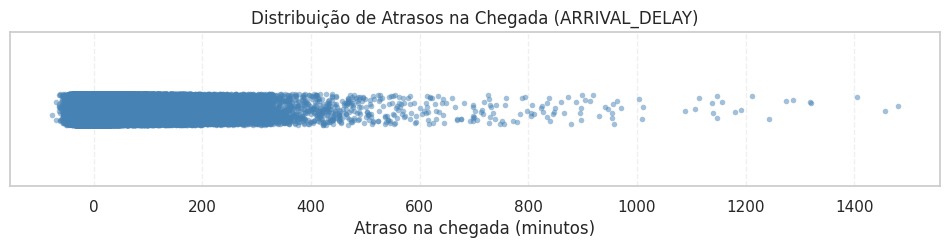

In [61]:
plt.figure(figsize=(12, 2))
sns.stripplot(x='ARRIVAL_DELAY', data=df, size=4, color='steelblue', alpha=0.5, jitter=True)
plt.title('Distribuição de Atrasos na Chegada (ARRIVAL_DELAY)')
plt.xlabel('Atraso na chegada (minutos)')
plt.grid(True, axis='x', linestyle='--', alpha=0.3)
plt.show()

In [62]:
# Contar valores com ARRIVAL_DELAY maior que 600
atrasos_extremos_taxi_out = df[df['ARRIVAL_DELAY'] > 600]
print(f"Total de voos com atraso na chegada superior a 600 minutos: {len(atrasos_extremos_taxi_out)}")

Total de voos com atraso na chegada superior a 600 minutos: 121


In [63]:
# Filtrar o DataFrame
df = df[df['ARRIVAL_DELAY'] <= 600]

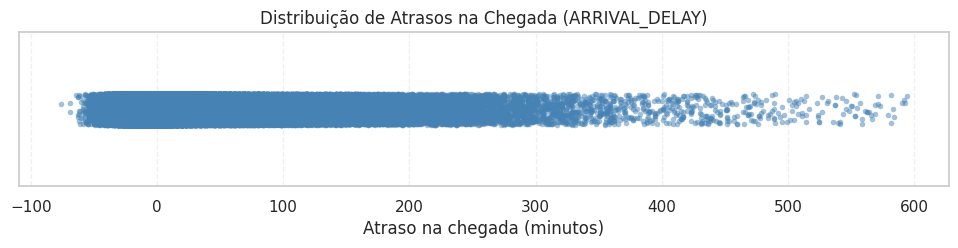

In [64]:
plt.figure(figsize=(12, 2))
sns.stripplot(x='ARRIVAL_DELAY', data=df, size=4, color='steelblue', alpha=0.5, jitter=True)
plt.title('Distribuição de Atrasos na Chegada (ARRIVAL_DELAY)')
plt.xlabel('Atraso na chegada (minutos)')
plt.grid(True, axis='x', linestyle='--', alpha=0.3)
plt.show()

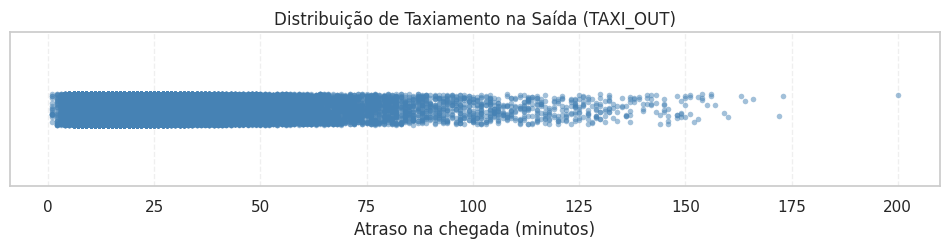

In [65]:
plt.figure(figsize=(12, 2))
sns.stripplot(x='TAXI_OUT', data=df, size=4, color='steelblue', alpha=0.5, jitter=True)
plt.title('Distribuição de Taxiamento na Saída (TAXI_OUT)')
plt.xlabel('Atraso na chegada (minutos)')
plt.grid(True, axis='x', linestyle='--', alpha=0.3)
plt.show()

In [66]:
# Contar valores com TAXI_OUT maior que 150
atrasos_extremos_taxi_out = df[df['TAXI_OUT'] > 150]
print(f"Total de voos com taxiamento de saída superior a 150 minutos: {len(atrasos_extremos_taxi_out)}")

Total de voos com taxiamento de saída superior a 150 minutos: 21


In [67]:
# Filtrar o DataFrame
df = df[df['TAXI_OUT'] <= 150]

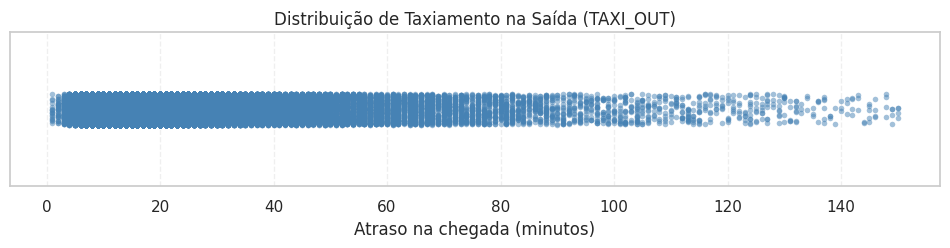

In [68]:
plt.figure(figsize=(12, 2))
sns.stripplot(x='TAXI_OUT', data=df, size=4, color='steelblue', alpha=0.5, jitter=True)
plt.title('Distribuição de Taxiamento na Saída (TAXI_OUT)')
plt.xlabel('Atraso na chegada (minutos)')
plt.grid(True, axis='x', linestyle='--', alpha=0.3)
plt.show()

Vamos verificar novamente as estatísticas descritivas básicas do dataset, após a remoção dos outliers.

In [69]:
# estatísticas descritivas básicas do dataset
df.describe()

,YEAR,MONTH,DAY,DAY_OF_WEEK,DEPARTURE_TIME,TAXI_OUT,DISTANCE,WHEELS_ON,ARRIVAL_TIME,ARRIVAL_DELAY,DELAYED
count,489499.0,489499.0,489499.000000,489499.000000,489499.000000,489499.000000,489499.000000,489499.000000,489499.000000,489499.000000,489499.000000
mean,2015.0,5.0,15.923928,4.099563,0.565175,15.700412,825.208603,0.620473,0.622230,4.271377,0.357582
std,0.0,0.0,8.903911,1.987921,0.207808,8.644577,608.601156,0.219375,0.221191,37.489659,0.479289
min,2015.0,5.0,1.000000,1.000000,0.000000,1.000000,31.000000,0.000000,0.000000,-76.000000,0.000000
25%,2015.0,5.0,8.000000,2.000000,0.388889,11.000000,377.000000,0.452778,0.455556,-13.000000,0.000000
50%,2015.0,5.0,16.000000,4.000000,0.562500,14.000000,649.000000,0.629861,0.631944,-5.000000,0.000000
75%,2015.0,5.0,24.000000,6.000000,0.738194,18.000000,1062.000000,0.800000,0.803472,7.000000,1.000000
max,2015.0,5.0,31.000000,7.000000,0.999306,150.000000,4983.000000,0.999306,0.999306,594.000000,1.000000


Após a remoção dos outliers através de um critério lúdico, podemos perceber que os valores de média e desvio padrão não se alteraram muito.

### Histograma

A distribuição de dados descreve como os valores de uma variável se espalham, ou seja, a frequência com que diferentes valores ocorrem. Entender a distribuição é crucial na análise de dados, pois revela padrões, tendências centrais, dispersão e a presença de valores atípicos (outliers). O histograma é uma ferramenta visual fundamental para representar essa distribuição, mostrando a forma dos dados, se são simétricos ou assimétricos, unimodais ou multimodais.

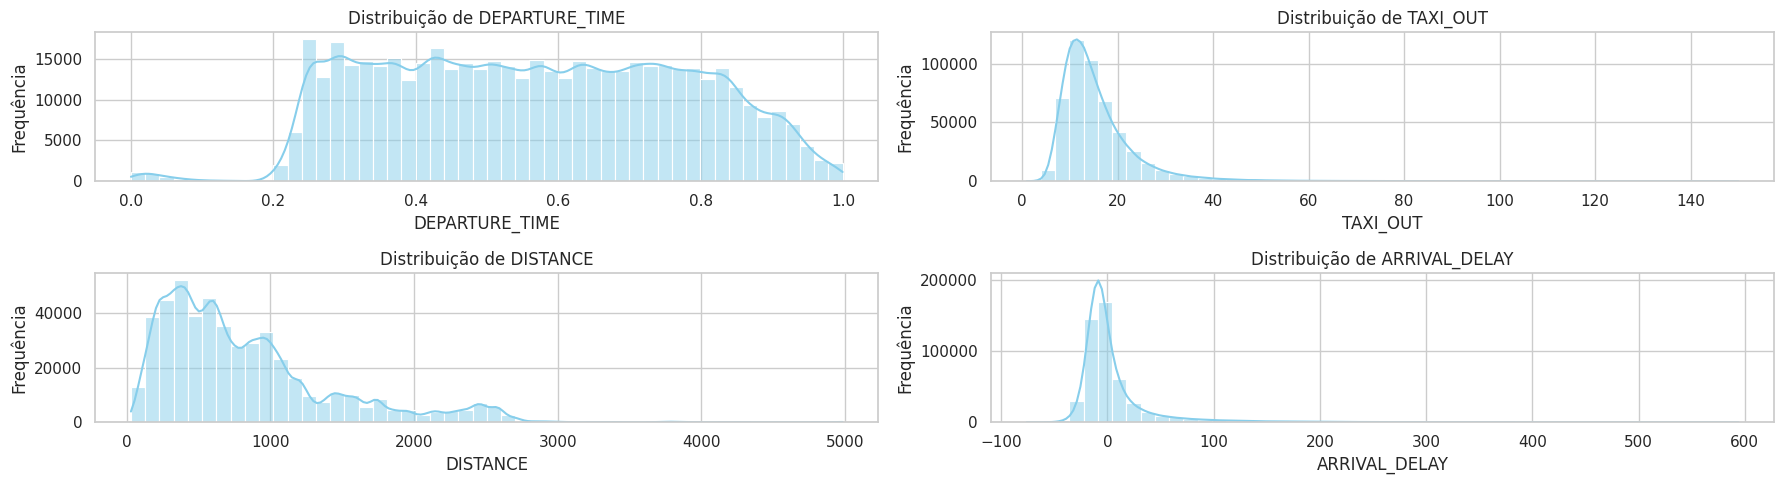

In [80]:
# Lista das variáveis a serem analisadas
variaveis = ['DEPARTURE_TIME', 'TAXI_OUT', 'DISTANCE', 'ARRIVAL_DELAY']

# Configurar o estilo dos gráficos
sns.set(style="whitegrid")

# Criar os histogramas com curva de densidade
plt.figure(figsize=(18, 5))

for i, var in enumerate(variaveis, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[var], kde=True, bins=50, color='skyblue')
    plt.title(f'Distribuição de {var}')
    plt.xlabel(var)
    plt.ylabel('Frequência')

plt.tight_layout()
plt.show()

### Distribuição dos Voos por Período do Dia e Dia da Semana

Abaixo, podemos identificar que não há uma variação relevante no número de voos, em relação aos dias da semana, que possa ser cosiderada um outlier. Embora seja visível que há um menor número vôos aos sábados (6) e maior às sextas-feiras (5).

Porém, podemos perceber um volume/preferência menor por vôos durante a madrugada.

Total de voos por dia da semana:


,count
DAY_OF_WEEK,
1,65288
2,65371
3,66027
4,67551
5,84445
6,65527
7,75290


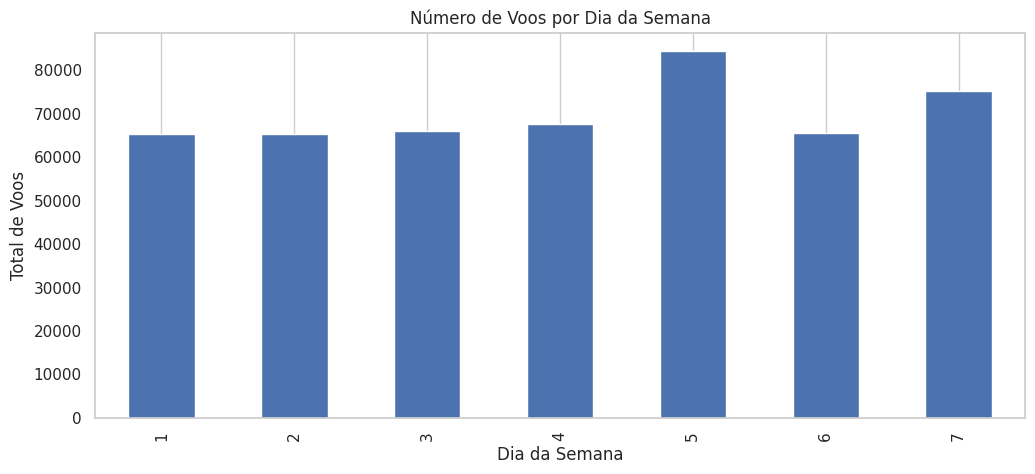

In [71]:
# Contagem de voos por dia da semana
voos_por_dia = df['DAY_OF_WEEK'].value_counts().sort_index()
print("Total de voos por dia da semana:")
display(voos_por_dia)

voos_por_dia.plot(kind='bar', figsize=(12,5), title='Número de Voos por Dia da Semana')
plt.xlabel('Dia da Semana')
plt.ylabel('Total de Voos')
plt.grid(axis='y')
plt.show()

Total de voos por período:


,count
DEPARTURE_TIME_PERIODO,
MADRUGADA,21061
MANHÃ,180440
NOITE,113701
TARDE,174297


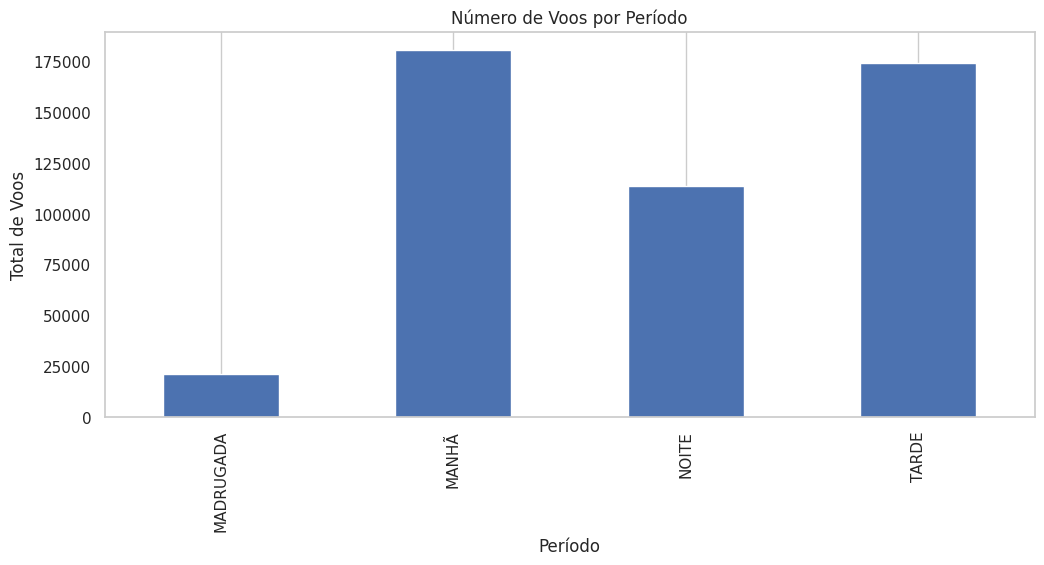

In [72]:
# Contagem de voos por período
voos_por_hora = df['DEPARTURE_TIME_PERIODO'].value_counts().sort_index()
print("Total de voos por período:")
display(voos_por_hora)

voos_por_hora.plot(kind='bar', figsize=(12,5), title='Número de Voos por Período')
plt.xlabel('Período')
plt.ylabel('Total de Voos')
plt.grid(axis='y')
plt.show()

### Média

A média é uma medida de tendência central que representa o valor típico ou o ponto de equilíbrio de um conjunto de dados. É calculada somando-se todos os valores e dividindo-se pelo número total de observações. É sensível a valores extremos (outliers).

/tmp/ipython-input-73-2165650393.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=media_por_periodo.index, y=media_por_periodo.values, palette='viridis')


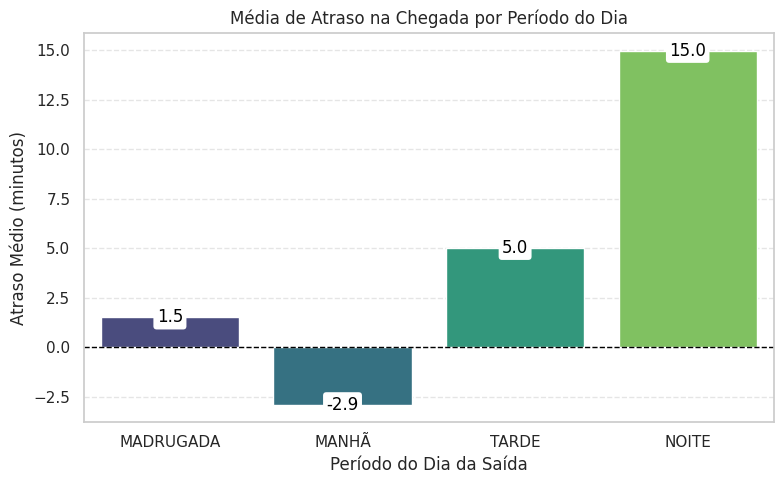

In [73]:
# Calcular a média de atraso por período do dia
media_por_periodo = df.groupby('DEPARTURE_TIME_PERIODO')['ARRIVAL_DELAY'].mean().reindex(['MADRUGADA', 'MANHÃ', 'TARDE', 'NOITE'])

# Plotar o gráfico
plt.figure(figsize=(8, 5))
ax = sns.barplot(x=media_por_periodo.index, y=media_por_periodo.values, palette='viridis')

# Adicionar rótulos nas barras
for i, valor in enumerate(media_por_periodo.values):
    ax.text(i, valor, f'{valor:.1f}',
            ha='center', va='center',
            color='black',
            bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.2'))

plt.title('Média de Atraso na Chegada por Período do Dia')
plt.xlabel('Período do Dia da Saída')
plt.ylabel('Atraso Médio (minutos)')
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


/tmp/ipython-input-74-3745328366.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=dias_semana, y=media_por_dia.values, palette='viridis')


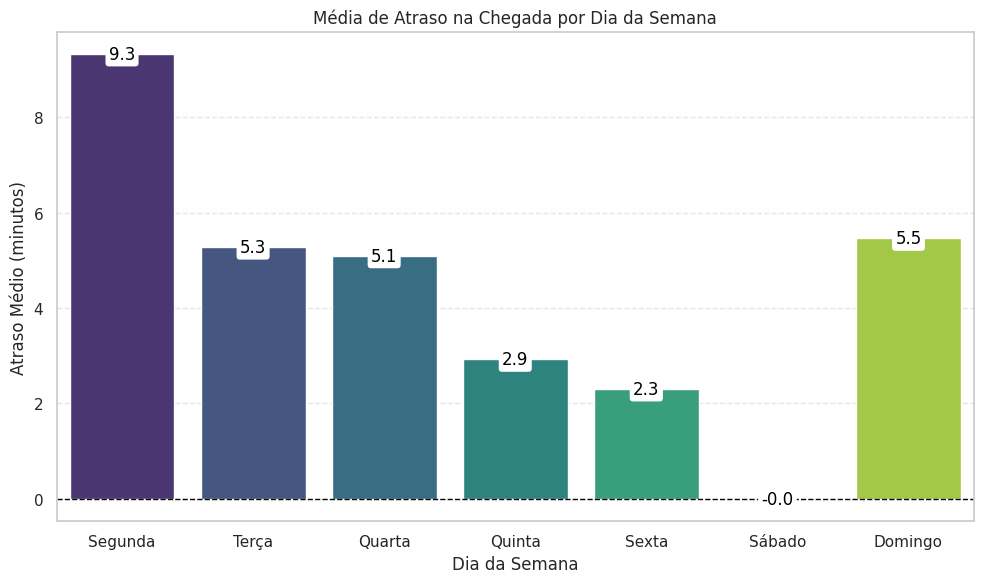

In [74]:
# Calcular a média de atraso por dia da semana
media_por_dia = df.groupby('DAY_OF_WEEK')['ARRIVAL_DELAY'].mean().reindex([1, 2, 3, 4, 5, 6, 7])
dias_semana = ['Segunda', 'Terça', 'Quarta', 'Quinta', 'Sexta', 'Sábado', 'Domingo']

# Plotar o gráfico
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=dias_semana, y=media_por_dia.values, palette='viridis')

# Adicionar rótulos nas barras
for i, valor in enumerate(media_por_dia.values):
    ax.text(i, valor, f'{valor:.1f}',
            ha='center', va='center',
            color='black',
            bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.2'))

# Títulos e estilo
plt.title('Média de Atraso na Chegada por Dia da Semana')
plt.xlabel('Dia da Semana')
plt.ylabel('Atraso Médio (minutos)')
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


## Matriz de Correlação

A matriz de correlação mede a força e a direção de uma relação linear que os atributos numéricos das espécies podem ter. Valores próximos a 1 indicam uma forte correlação positiva, -1 uma forte correlação negativa, e 0 ausência de correlação linear.

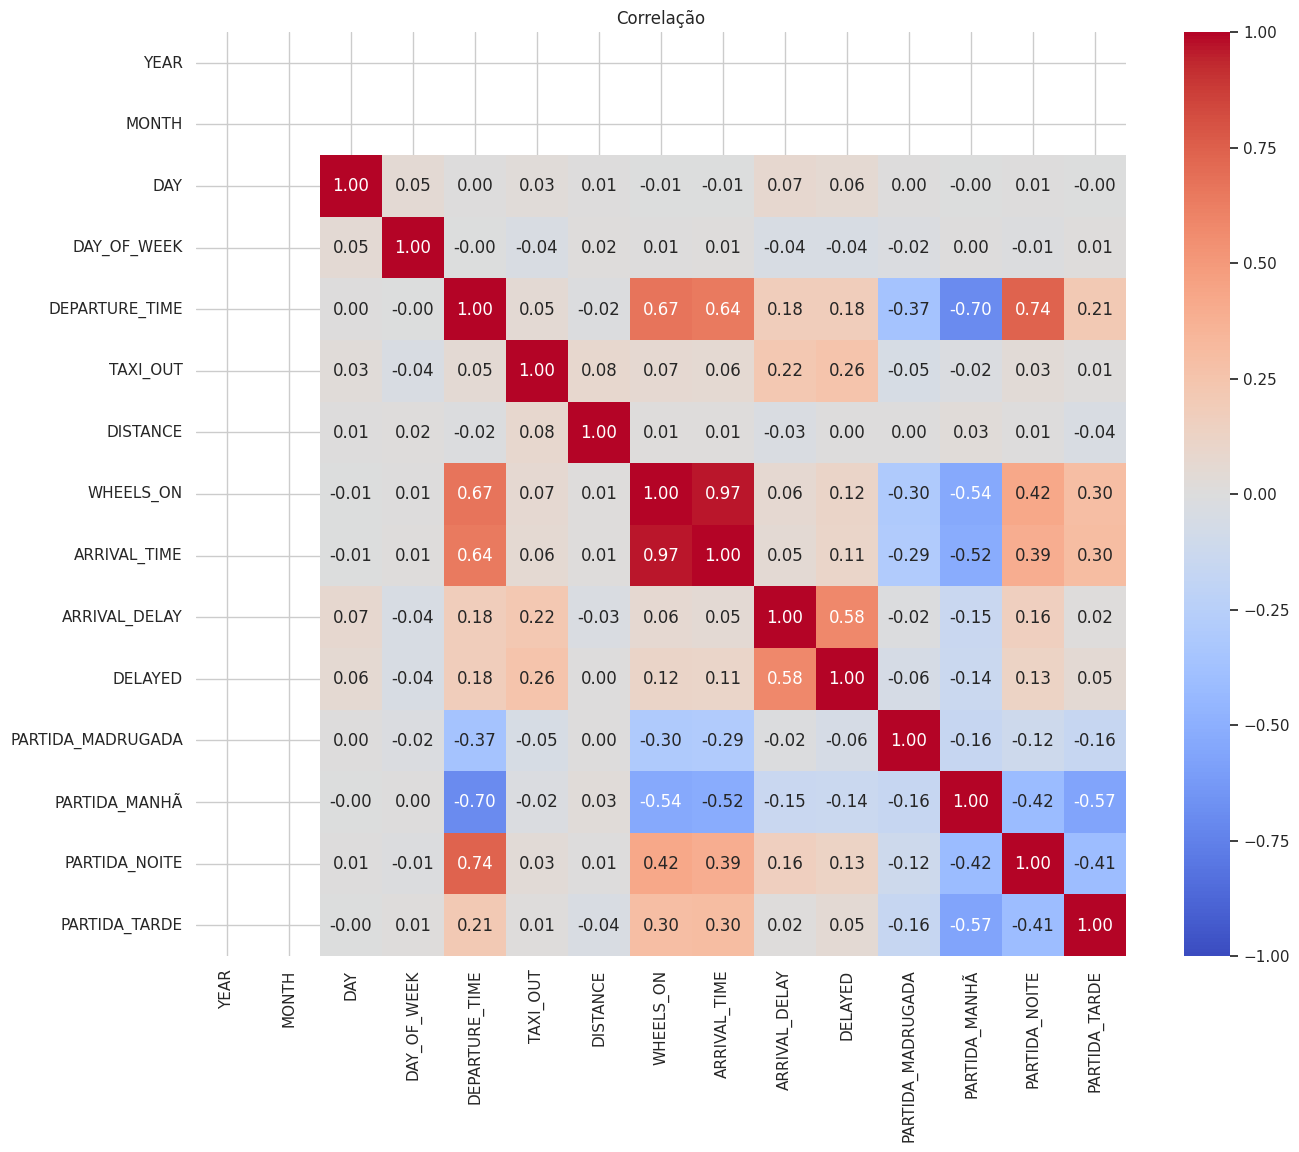

In [82]:
# Seleciona apenas colunas numéricas
num_cols = df.select_dtypes('number').columns
corr = df[num_cols].corr()

plt.figure(figsize=(15, 12))
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlação')
plt.show()

O mapa de calor da matriz de correlação revela correlações positivas entre *TAXI_OUT* (tempo de taxiamento na saída) e *DELAYED* (se um vôo é atrasado, ou não). Porém, não podemos perceber uma correlação entre *DISTANCE* (distância de um vôo) e se o mesmo esteve atrasado, ou não.

Além disso, podemos perceber uma maior correlação positiva do atributo *DELAYED* com *PARTIDA_NOITE*, uma correlação nula entre esse pricipal atributo com *PARTIA_TARDE* E *PARTIDA_MADRUGADA* e, por fim, uma correlação negativa com o atributo *PARTIDA_MANHÃ*.

# Pré-Processamento de Dados

O pré-processamento de dados é uma etapa crucial para preparar os dados para modelagem, garantindo que estejam no formato correto e otimizados para o desempenho do algoritmo.

## Codificação do Período de Saída
Vamos transformar a variável categórica "DEPARTURE_TIME_PERIODO" em numérica, pelo processo de codificação conhecido como *one-hot encoding*.

In [76]:
# Codificar a coluna DEPARTURE_TIME_PERIODO com one-hot encoding
df = pd.get_dummies(df, columns=['DEPARTURE_TIME_PERIODO'], prefix='PARTIDA', dtype = int)

# Visualizar colunas resultantes
df.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,DEPARTURE_TIME,TAXI_OUT,DISTANCE,WHEELS_ON,ARRIVAL_TIME,ARRIVAL_DELAY,DELAYED,PARTIDA_MADRUGADA,PARTIDA_MANHÃ,PARTIDA_NOITE,PARTIDA_TARDE
0,2015,5,1,5,0.996528,13.0,2330,0.318750,0.324306,-5.0,0,0,0,1,0
1,2015,5,1,5,0.006250,23.0,2402,0.346528,0.352778,3.0,1,1,0,0,0
2,2015,5,1,5,0.010417,21.0,1379,0.225000,0.230556,11.0,1,1,0,0,0
3,2015,5,1,5,0.002778,11.0,1660,0.234722,0.237500,-28.0,0,1,0,0,0
4,2015,5,1,5,0.011806,19.0,1727,0.248611,0.252778,-3.0,0,1,0,0,0


## Separação do Dataset
Por fim, vamos separar o modelo entre dados de treino e teste, para utilização futura.

In [77]:
# Separar features (X) e target (y)
X = df.drop(columns=['PARTIDA_MADRUGADA', 'PARTIDA_MANHÃ', 'PARTIDA_NOITE', 'PARTIDA_TARDE', 'DAY_OF_WEEK', 'TAXI_OUT', 'DISTANCE', 'DELAYED'])
y = df['DELAYED']

In [78]:
# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [79]:
print(f"Dimensões de X_train: {X_train.shape}")
print(f"Dimensões de X_test: {X_test.shape}")
print(f"Dimensões de y_train: {y_train.shape}")
print(f"Dimensões de y_test: {y_test.shape}")

Dimensões de X_train: (342649, 7)
Dimensões de X_test: (146850, 7)
Dimensões de y_train: (342649,)
Dimensões de y_test: (146850,)


# Conclusão

As três hipóteses levantadas foram validadas:

1.   *É possível estimar se um voo terá atraso na chegada com base na hora de partida e no dia da semana?*  Sim, dado as análises de médias que fizemos, observamos que dias como Domingo e Segunda apresentam significantemente mais atraso que dias como Sexta-Feira ou Sábado.

2.   *Existe uma correlação entre atraso na chegada de um voo e o tempo de taxiamento na saída?*  Existe correlação fraca (<0,5) entre os atributos TAXI_OUT e DELAYED

3.   *A distância do voo pode ser usada para prever o tempo de atraso na chegada?*  Não, pois não foi identificado padroes de atrasos de acordo com a distância e nem correlações entre os atributos.